(sec_gen)=

# Generating Scenarios

## Generating individual scenarios
The [development scenario set](https://airliftchallenge.com/scenarios/scenarios_dev.zip) provides a series of simple scenarios that can be used for development. Here, we show the code required to generate these scenarios. You can use this code as a template for generating your own scenarios. Each code snippet produces an environment against which you can run your solution using the doepisode method. To increase the speed of scenario generation, we do not use the Perlin map generator for these scenarios, but instead use a plain map.

## Initialization

In [ ]:
from airlift.envs import PlaneType
from airlift.envs import EventIntervalGenerator, NoEventIntervalGen
from airlift.envs import StaticCargoGenerator, DynamicCargoGenerator
from airlift.envs import AirliftEnv, AirliftWorldGenerator
from airlift.envs import AirplaneGenerator, RandomAirportGenerator, RouteByDistanceGenerator, LimitedDropoffEntryRouteGenerator
from airlift.envs import PerlinMapGenerator, PlainMapGenerator

working_capacity = 2
processing_time = 10
num_airports = 20
num_cargo = 600
num_agents = 200
num_drop_off_airports = 3
num_pick_up_airports = 3
soft_deadline_multiplier = 25
hard_deadline_multiplier = 50

num_dynamic_cargo = 5
dynamic_cargo_generation_rate = 1/100
malfunction_rate = 1 / 300
min_duration = 10
max_duration = 100
route_ratio = 2

drop_off_fraction_reachable = 0.2
pick_up_fraction_reachable = 0.2

single_plane_type = [PlaneType(id=0, max_range=3, speed=0.4, max_weight=10)]

multiple_plane_types = [PlaneType(id=0, max_range=3, speed=0.2, max_weight=20),
                        PlaneType(id=1, max_range=2, speed=0.5, max_weight=3)]

max_cycles = 5000

## One plane type, No zones

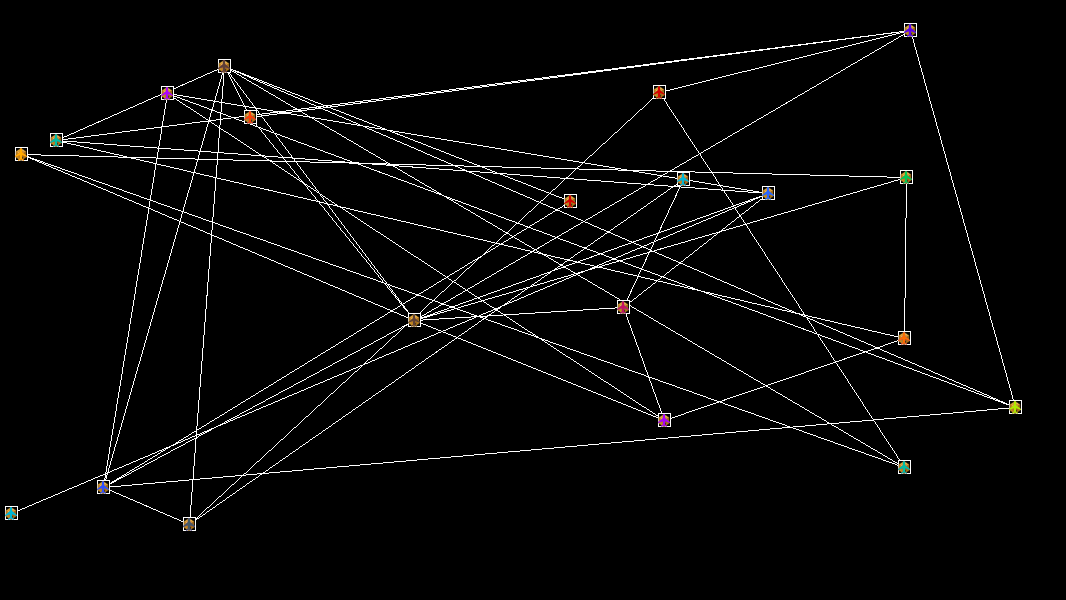

In [2]:
env = AirliftEnv(
         world_generator=AirliftWorldGenerator(
             plane_types=single_plane_type,
             airport_generator=RandomAirportGenerator(
                 max_airports=num_airports,
                 processing_time=processing_time,
                 working_capacity=working_capacity,
                 make_drop_off_area=False,
                 make_pick_up_area=False,
                 num_drop_off_airports=1,
                 num_pick_up_airports=1,
                 mapgen=PlainMapGenerator()),
             route_generator=RouteByDistanceGenerator(
                 malfunction_generator=EventIntervalGenerator(
                     malfunction_rate=malfunction_rate,
                     min_duration=min_duration,
                     max_duration=max_duration),
                 route_ratio=route_ratio),
             cargo_generator=DynamicCargoGenerator(
                 cargo_creation_rate=dynamic_cargo_generation_rate,
                 max_cargo_to_create=num_dynamic_cargo,
                 num_initial_tasks=num_cargo,
                 soft_deadline_multiplier=soft_deadline_multiplier,
                 hard_deadline_multiplier=hard_deadline_multiplier),
             airplane_generator=AirplaneGenerator(num_agents),
             max_cycles=max_cycles
         )
)
env.reset(seed=54)
env.set_render_options(show_routes=True)
display(env.render_to_image())

## Multiple plane types, No zones

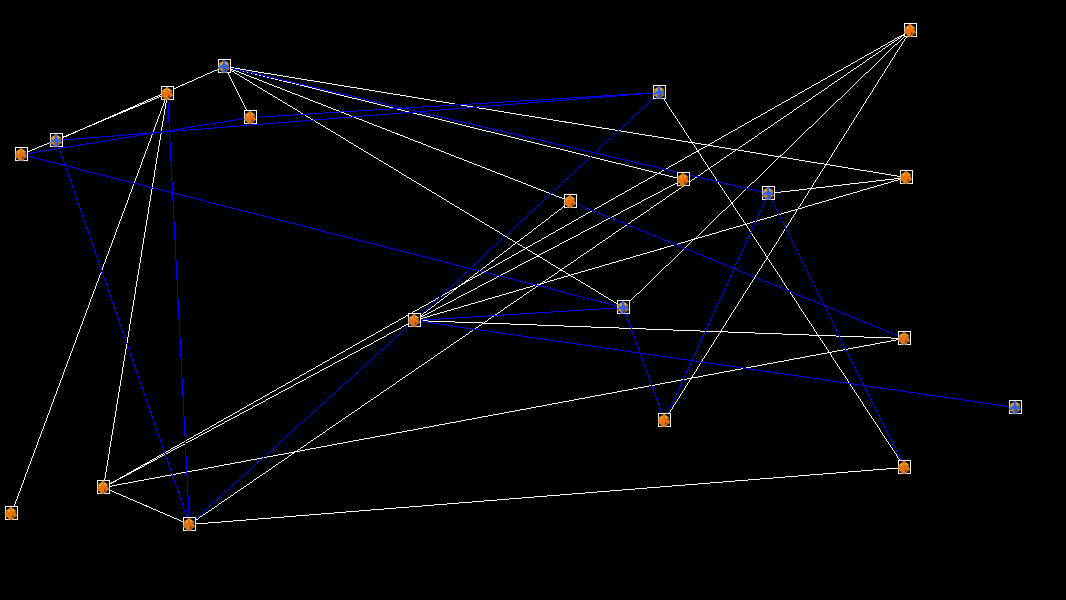

In [3]:
env = AirliftEnv(
         world_generator=AirliftWorldGenerator(
             plane_types=multiple_plane_types,
             airport_generator=RandomAirportGenerator(
                 max_airports=num_airports,
                 processing_time=processing_time,
                 working_capacity=working_capacity,
                 make_drop_off_area=False,
                 make_pick_up_area=False,
                 num_drop_off_airports=1,
                 num_pick_up_airports=1,
                 mapgen=PlainMapGenerator()),
             route_generator=RouteByDistanceGenerator(
                 malfunction_generator=EventIntervalGenerator(
                     malfunction_rate=malfunction_rate,
                     min_duration=min_duration,
                     max_duration=max_duration),
                 route_ratio=route_ratio),
             cargo_generator=DynamicCargoGenerator(
                 cargo_creation_rate=dynamic_cargo_generation_rate,
                 max_cargo_to_create=num_dynamic_cargo,
                 num_initial_tasks=num_cargo,
                 soft_deadline_multiplier=soft_deadline_multiplier,
                 hard_deadline_multiplier=hard_deadline_multiplier),
             airplane_generator=AirplaneGenerator(num_agents),
             max_cycles=max_cycles
         )
)
env.reset(seed=54)
env.set_render_options(show_routes=True)
display(env.render_to_image())

## Multiple plane types, With zones, No restrictions on routes

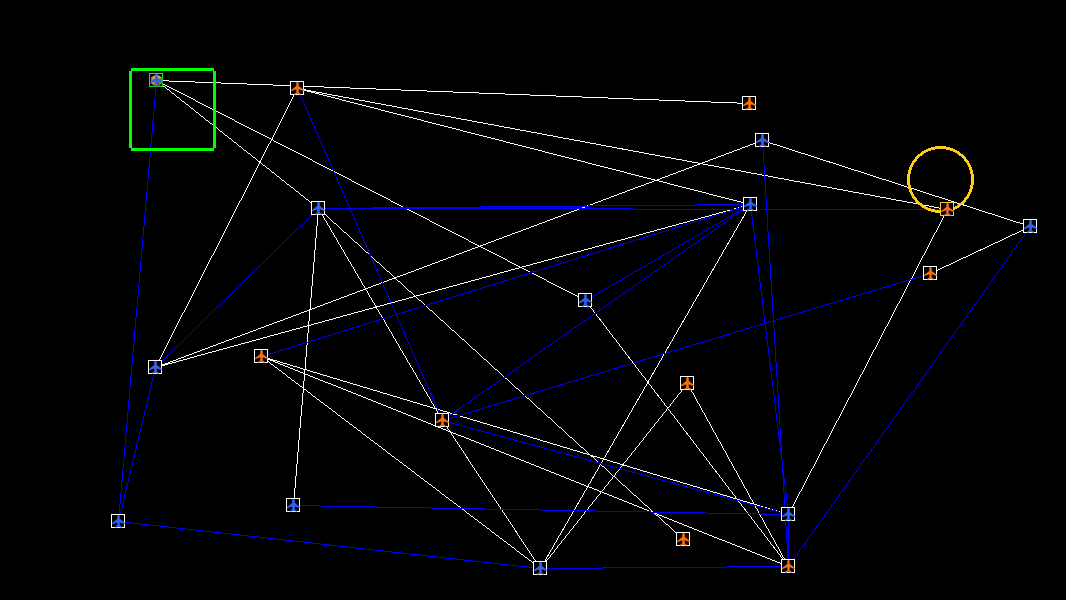

In [4]:
env = AirliftEnv(
         world_generator=AirliftWorldGenerator(
             plane_types=multiple_plane_types,
             airport_generator=RandomAirportGenerator(
                 max_airports=num_airports,
                 processing_time=processing_time,
                 working_capacity=working_capacity,
                 make_drop_off_area=True,
                 make_pick_up_area=True,
                 num_drop_off_airports=1,
                 num_pick_up_airports=1,
                 mapgen=PlainMapGenerator()),
             route_generator=RouteByDistanceGenerator(
                 malfunction_generator=EventIntervalGenerator(
                     malfunction_rate=malfunction_rate,
                     min_duration=min_duration,
                     max_duration=max_duration),
                 route_ratio=route_ratio),
             cargo_generator=DynamicCargoGenerator(
                 cargo_creation_rate=dynamic_cargo_generation_rate,
                 max_cargo_to_create=num_dynamic_cargo,
                 num_initial_tasks=num_cargo,
                 soft_deadline_multiplier=soft_deadline_multiplier,
                 hard_deadline_multiplier=hard_deadline_multiplier),
             airplane_generator=AirplaneGenerator(num_agents),
             max_cycles=max_cycles
         )
)
env.reset(seed=55)
env.set_render_options(show_routes=True)
display(env.render_to_image())

## Generating a complete set of scenarios for evaluation

You can also generate a set of files by using this [generator script](https://github.com/airlift-challenge/airlift/airlift/evaluators/generate_dev_scenarios.py) as a template. These files can then be used in conjunction with the local evaluator as described in the [starter kit](https://github.com/airlift-challenge/airlift-starter-kit).